# Customer satisfaction prediction

## Dataset structure
| n    | Variable                      | Description                                                  |
| :--- | :---------------------------- | :----------------------------------------------------------- |
| 1    | id                            | Client ID                                                    |
| 2    | Gender                        | Client Gender                                                |
| 3    | Customer type                 | Client type: Premium or Standard                             |
| 4    | Age                           | Client Age                                                   |
| 5    | Price                         | Client Age                                                   |
| 6    | New/Used                      | Client Age                                                   |
| 7    | Category                      | Client Age                                                   |
| 8    | Product description accuracy  | Level of satisfaction on product description                 |
| 9    | Manufacturer stainability     | Level of satisfaction on the manufacturing sustainability process |
| 10   | Packaging quality             | Level of satisfaction on packaging                           |
| 11   | Additional options            | Level of satisfaction on extra options                       |
| 12   | Reviews and ratings           | Level of satisfaction on reviews and rating information      |
| 13   | Integrity of packaging        | Level of satisfaction on packaging state                     |
| 14   | Check-out procedure           | Level of satisfaction on payment procedure                   |
| 15   | Relevance of related products | Level of satisfaction on related product suggestion          |
| 16   | Costumer insurance            | Level of satisfaction on insurance options                   |
| 17   | Shipping delay in days        | Delay of shipping in days                                    |
| 18   | Arrival delay in days         | Arrival delay on days                                        |
| 19   | Satisfaction                  | Target: Satisfied, Not Satisfied                             |

In [40]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

***
## Useful function

In [64]:
# Function to load normal dataset and to return train and test split
def load_normaldf(test = 0.3):
    df = pd.read_csv('../data/processed/models_processed.csv')
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    X_train, X_Test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size= .3,
                                                        stratify= y,
                                                        random_state=42)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

In [58]:
# Function to load downsampled dataset and to return train and test split
def load_downldf(test = 0.3):
    df = pd.read_csv('../data/processed/model_proc_down.csv')
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    X_train, X_Test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size= .3,
                                                        random_state=42)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

In [69]:
# Function to brute force searching and printing results
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("Score: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1=====\ntrain: %.3f\ntest: %.3f\n=====" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("\nPrecision=====\ntrain: %.3f\ntest: %.3f\n=====" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = '2d', cmap='Oranges')
    plt.show()
    return best_model

In [62]:
# Plot ROC curve and AUC score
def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

***
## Model fitting

***
#### KNN Normal dataset

In [66]:
X_train, X_test, y_train, y_test = load_normaldf()

(35000, 23) (15000, 23) (35000,) (15000,)


In [67]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,500,20)}

Score: 0.255103 using {'n_neighbors': 10}
f1=====
train: 0.399
test: 0.259
=====

Precision=====
train: 0.647
test: 0.422
=====



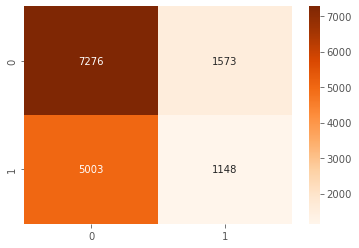

In [70]:
best_model = hyperp_search(classifier,parameters)

f1_train: 0.373384 using {'n_neighbors': 5}
f1=====
train: 0.601
test: 0.373
=====

Precision=====
train: 0.665
test: 0.415
=====



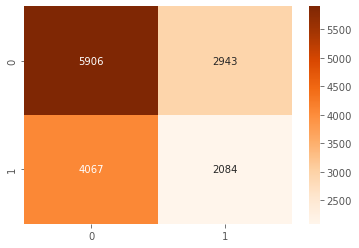

In [39]:
parameters = {'n_neighbors':np.arange(4,20,1)}
hyperp_search(classifier, parameters)

In [71]:
# save to pickle
import pickle
with open('../models/normal_df/KNN.pkl','wb') as file:
    pickle.dump(best_model, file)